<a href="https://colab.research.google.com/github/aguusandy/pdi-2024/blob/master/entrega1_Lopez_Andino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Entrega de práctica 1 de Andino Agustin y Lopez Lorenzo

## Guía 1 - Ejercicio 3

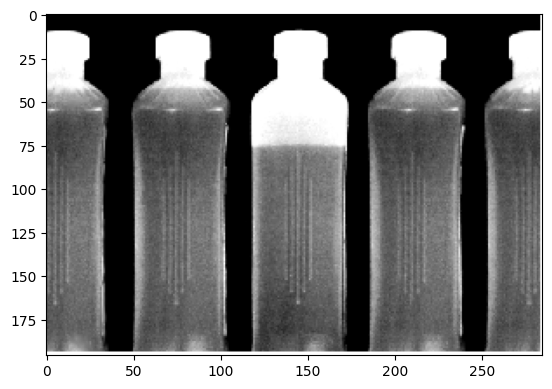

In [4]:
# ploteo de la imagen de las botellas
import cv2
from matplotlib import pyplot as plt
import numpy as np

url_img_botella = "botellas.tif"
img_botella = cv2.imread(url_img_botella,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_botella,cmap='gray')

### Para saber si una botella esta llena se consideran los siguientes pasos:

1. Coloco una linea horizontal como el limite minimo para que se considere llena la botella
2. Consido una aproximacion de 100 pixeles por botella
3. Comienzo a recorrer los pixeles del eje x, hasta que los proximos 5 pixeles a la derecha tengan valor 0, es decir, sea el fondo negro. Mantengo este contador para saber en que pixel x me encuentro, de modo de estar sobre la botella
4. Saco un promedio de la intensidad

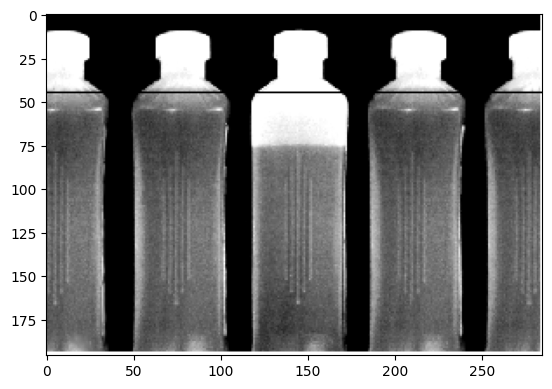

In [ ]:
# propongo la linea limite donde considero que esta llena la botella
lim_y = 45
img_botella_min = img_botella.copy()
# tamaño de pixeles en x e y para la imagen
size_x = img_botella_min.shape[1]
size_y = img_botella_min.shape[0]
cv2.line(img_botella_min, (0,lim_y), (size_x,lim_y), color=(0, 255, 0) , thickness=1)
plt.imshow(img_botella_min,cmap='gray')

In [ ]:
def funcion_mayor(vector,escalar):
  res = vector > escalar
  return res.any() == False

def pos_termina_botella(pos_actual,img,max_x):
  # uso y = 100
  contador = pos_actual
  while img[100,contador] > 0 and contador < max_x-1:
    contador+=1
  return contador

In [ ]:
# recorro en x, por debajo de la linea limite, para saber si me encuentro dentro de una botella
# si la intensidad en [x,y] es 0 entonces estoy fuera
# si la intensidad en [x,y] es mayor a 0 entonces estoy dentro de una botella
# si la intensidad en [x,y] es mayor a 220 entonces esta vacia la botella
pos_x = 0
botella = True
vector_botellas = []
while pos_x < size_x-1:
  final_botella = pos_termina_botella(pos_x,img_botella_min,size_x)
  dif_pixeles = final_botella - pos_x
  # verifico si estoy dentro de una botella
  if img_botella_min[lim_y-1,pos_x + int(dif_pixeles/2)] > 0:
    # encuentro donde termina la botella
    if img_botella_min[lim_y-1,pos_x + int(dif_pixeles/2)] >220: # esta vacia la botella, entonces la remarco
      # remarco la botella vacia
      print("pos x ",pos_x)
      print("final_botella ",final_botella)
      print("dif pixeles ",dif_pixeles)
      vector_botellas.append([[pos_x,lim_y-10],[pos_x+dif_pixeles,size_y]])
    pos_x = final_botella
  else:
    pos_x+=1

pos x  118
final_botella  172
dif pixeles  54


[118, 35]
[172, 196]


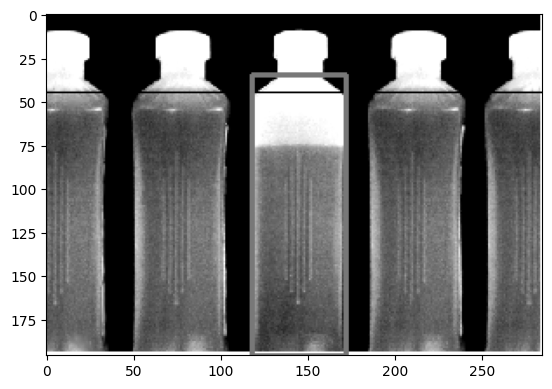

In [ ]:
# identificamos las botellas vacias encerrandolas en un rectangulo
for i in range(0,len(vector_botellas)):
  aux = vector_botellas[i]
  punto0 = aux[0]
  print(punto0)
  punto1 = aux[1]
  print(punto1)
  cv2.rectangle(img_botella_min, punto0, punto1, color=(120, 120, 0) , thickness=2)

plt.figure()
plt.imshow(img_botella_min,cmap='gray')
plt.show()

## Informar cuan lleno esta

In [ ]:
img = cv2.imread(url_img_botella,cv2.IMREAD_GRAYSCALE)
cv2.line(img, (146,15), (146,50), color=255 , thickness=1)
#reccoremos el vector de las botellas vacias.
# Definimos la mitad de la botella en x.
# Recorremos "y" como el comienzo de la botella vacia desde arriba hacia abajo
# hasta encontrar el contenido de la botella dado por su tonalidad de gris.
# Se observo que en la botella los valores de grises con contenido liquido
# no son mayores a 175, y donde se encuentra vacio no son menores a 210 por lo que
# para  controlar si esta vacio nos fijamos que el pixel sea mayor a 200.
# Luego aplicamos regla de 3 simple para obtener el porcentaje de llenado
for i in range(0,len(vector_botellas)):
  print("botella no llena ",i+1,":")
  botella = vector_botellas[i]
  punto1 = botella[0]; punto2 = botella[1]
  y = lim_y+1
  #buscamos hasta que pixel se encuentra llena la llena la botella
  while img[y,int(punto1[0]+(punto2[0]-punto1[0])/2)] > 200 and y < size_y-1:
    y+=1
  porcentaje_llenado = 100-(y-lim_y)*100/(size_y-lim_y)
  print("porcentaje de llenado: ",porcentaje_llenado)

botella no llena  1 :
  as 255
porcentaje de llenado:  80.13245033112582


## Guía 2 - Ejercicio 4.2 / Guía 2 - Ejercicio 4.3


In [ ]:
def multiplicacion_imagen(img,mask):
    roi = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            roi[i,j] = img[i,j]*mask[i,j]
            # roi[i,j] = np.clip( roi[i,j].astype(np.uint8) , 0, 255)
    return roi/255

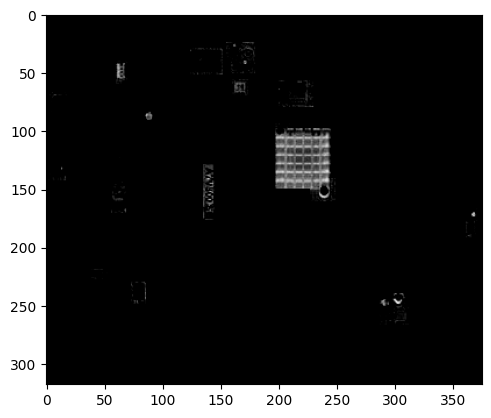

In [ ]:
# EJRCICIO 4.2
# Primero usamos la resta para darnos cuenta que lugares son los mas diferenciables entre ambas placas
# roi = x entre(100,150) e y entre (200,250)
placa_SE = plt.imread("a7v600-SE.gif",cv2.IMREAD_GRAYSCALE)
placa_X = plt.imread("a7v600-X.gif",cv2.IMREAD_GRAYSCALE)
placa_SE_ruido = plt.imread("a7v600-SE(RImpulsivo).gif",cv2.IMREAD_GRAYSCALE)
placa_X_ruido = plt.imread("a7v600-X(RImpulsivo).gif",cv2.IMREAD_GRAYSCALE)

dif = cv2.subtract(placa_SE,placa_X)
plt.imshow(dif,cmap='gray')

# Guardamos las ROIs de la parte mas diferenciable para ambos tipos de placa, tambien guardamos la mascara.
mask = np.zeros(placa_X.shape).astype(np.uint8)
mask[100:150,200:250] = 1
placa_SE_roi = multiplicacion_imagen(placa_SE,mask)
placa_X_roi = multiplicacion_imagen(placa_X,mask)

In [ ]:
#Recibimos la placa obtenemos la ROIs con la mascara previamente guardada.
#Comparamos la ROI obtenida con la dos ROIs que tambien guardamos previamente.
#Aquel resultado que tenga un error cuadratico menor sera la que tomaremos como tipo de placa.
def tipo_placa(placa):
    tipo_placa = ''
    placa_roi = multiplicacion_imagen(placa,mask)
    dif_SE = cv2.subtract(placa_roi,placa_SE_roi)
    dif_X = cv2.subtract(placa_roi,placa_X_roi)
    if np.sum(dif_X**2) < np.sum(dif_SE**2):
        tipo_placa = 'a7v600-X'
    else:
        tipo_placa = 'a7v600-SE'
    return tipo_placa

In [ ]:
#Pruebas
print(tipo_placa(placa_SE))
print(tipo_placa(placa_X))
print(tipo_placa(placa_X_ruido))
print(tipo_placa(placa_SE_ruido))

a7v600-SE
a7v600-X
a7v600-X
a7v600-SE


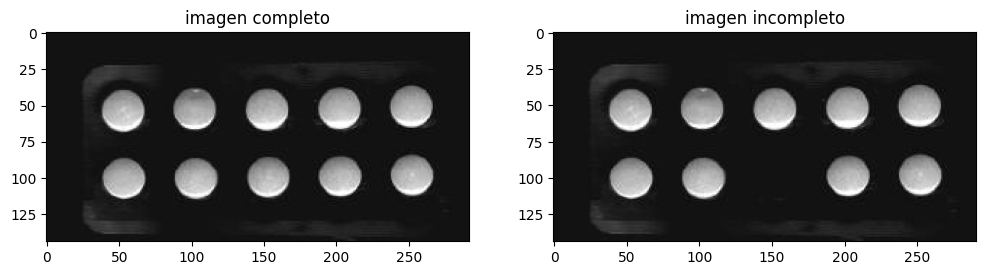

In [ ]:
# EJERCICIO 4.3
blister_completo = cv2.imread('blister_completo.jpg',cv2.IMREAD_GRAYSCALE)
blister_incompleto = cv2.imread('blister_incompleto.jpg',cv2.IMREAD_GRAYSCALE)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

ax[0].imshow(blister_completo,cmap='gray')
ax[0].set_title('imagen completo')
ax[1].imshow(blister_incompleto,cmap='gray')
ax[1].set_title('imagen incompleto')
plt.show()

In [ ]:
# Función para crear una LUT por tamos
# tengo que pasar como parametros:
# tramos: vector que representa donde empieza y termina cada tramo
# a y c son vectores con el mismo tamaño que v, donde cada a,c[i] corresponde a cada tramo
def make_lut_tramos(a,c,tramos):
    iteraciones = len(tramos)
    lut = np.zeros(256, dtype=np.uint8)
    for i in range(iteraciones):
        # aplico el clip, para que no se vaya de [0,255]
        tramo = tramos[i]
        lut[ tramo ] = np.clip( (a[i]*tramo + c[i]).astype('int') , 0, 255)
    return lut

def diferencia_imagenes(dif,img1,img2):
    img_salida = img1 - img2
    # metodo 1 -> sumar 255 y dividir por 2
    if dif == 0:
        img_salida = ( (img_salida + 255)*0.5 ).astype(np.uint8)
    # metodo 2 -> restar el mınimo y escalar a 255
    else:
        img_salida = np.clip( (img_salida - np.min(img_salida) ).astype(np.uint8) , 0, 255)
    return img_salida

In [ ]:
# este metodo funciona para la diferencia de imagenes de tipo 0
def buscar_faltante(img):
    faltantes = []
    # defino una grilla de 50 pixeles de ancho por 50 de alto
    puntos_y = [25,75,125]
    puntos_x = [25,75,125,175,225,275]
    # defino un tono de intensidad promedio -> si el promedio de gris dentro de la grilla
    # esta por debajo entonces hay un faltante
    intensidad_max = 110
    for i in range(len(puntos_y)-1):
        for j in range(len(puntos_x)-1):
            print('promedio ',np.mean(img[puntos_y[i]:puntos_y[i+1],puntos_x[j]:puntos_x[j+1]]))
            if np.mean(img[puntos_y[i]:puntos_y[i+1],puntos_x[j]:puntos_x[j+1]]) < intensidad_max:
                faltantes.append([puntos_y[i],puntos_x[j]])
    return faltantes

def revisar_blister(img):
    img_completa = cv2.imread('blister_completo.jpg',cv2.IMREAD_GRAYSCALE)
    #resize de la image por si no corresponden las dimensiones
    if img.shape != img_completa.shape:
        img_completa = cv2.resize(blister_completo, img.shape[::-1])
    # defino 2 tramos de la escala de grises, como las pastillas tienen un tono muy claro con respecto al fondo oscuro
    # me conviene hacer un aumento de contraste, de modo que aquello oscuro tienda a 0 y lo claro a 255
    tramos_v = [np.arange(0,100),np.arange(100,256)]
    #  parametros del lut para aumentar el contraste
    a_v = [0,1]
    c_v = [0,0]
    # arm el lut y se lo aplico a la imagen
    lut = make_lut_tramos(a_v,c_v,tramos_v)
    img_completa_lut = cv2.LUT(img_completa, lut)
    img_lut = cv2.LUT(img, lut)
    # obtengo la diferencia entre a imagen del blister completo con la que acabamos de procesar
    img_dif = diferencia_imagenes(0,img_lut,img_completa_lut)
    faltantes = buscar_faltante(img_dif)
    #ploteo los resultados
    fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(12,12))
    ax[0].imshow(img_completa_lut,cmap='gray')
    ax[0].set_title('imagen completo')
    ax[1].imshow(img_lut,cmap='gray')
    ax[1].set_title('imagen incompleto')
    ax[2].imshow(img_dif,cmap='gray')
    ax[2].set_title('diferencia imagen')
    # si existen faltantes los remarco en la imagen
    if len(faltantes) > 0:
        print('faltantes en los puntos: ',faltantes)
        for faltante in faltantes:
            ax[2].plot([faltante[1],faltante[1]+50],[faltante[0],faltante[0]],'-b')
            ax[2].plot([faltante[1],faltante[1]],[faltante[0],faltante[0]+50],'-b')
            ax[2].plot([faltante[1]+50,faltante[1]+50],[faltante[0],faltante[0]+50],'-b')
            ax[2].plot([faltante[1],faltante[1]+50],[faltante[0]+50,faltante[0]+50],'-b')
    else:
        print('No hay faltantes')
    plt.show()

promedio  116.9176
promedio  116.9696
promedio  114.8432
promedio  114.382
promedio  111.9256
promedio  120.19
promedio  114.4472
promedio  105.32
promedio  114.9928
promedio  113.8276
faltantes en los puntos:  [[75, 125]]


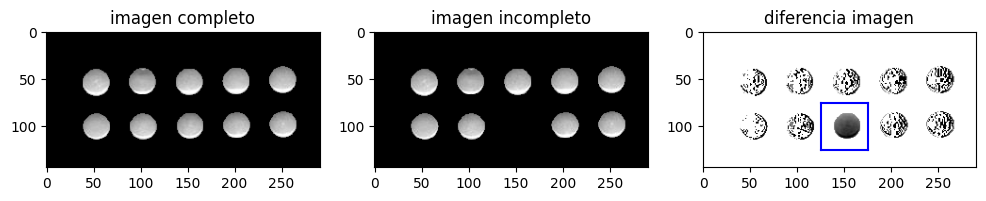

In [ ]:
blister_incompleto = cv2.imread('blister_incompleto.jpg',cv2.IMREAD_GRAYSCALE)
revisar_blister(blister_incompleto)

## Guía 2.2 - Ejercicio 1.2

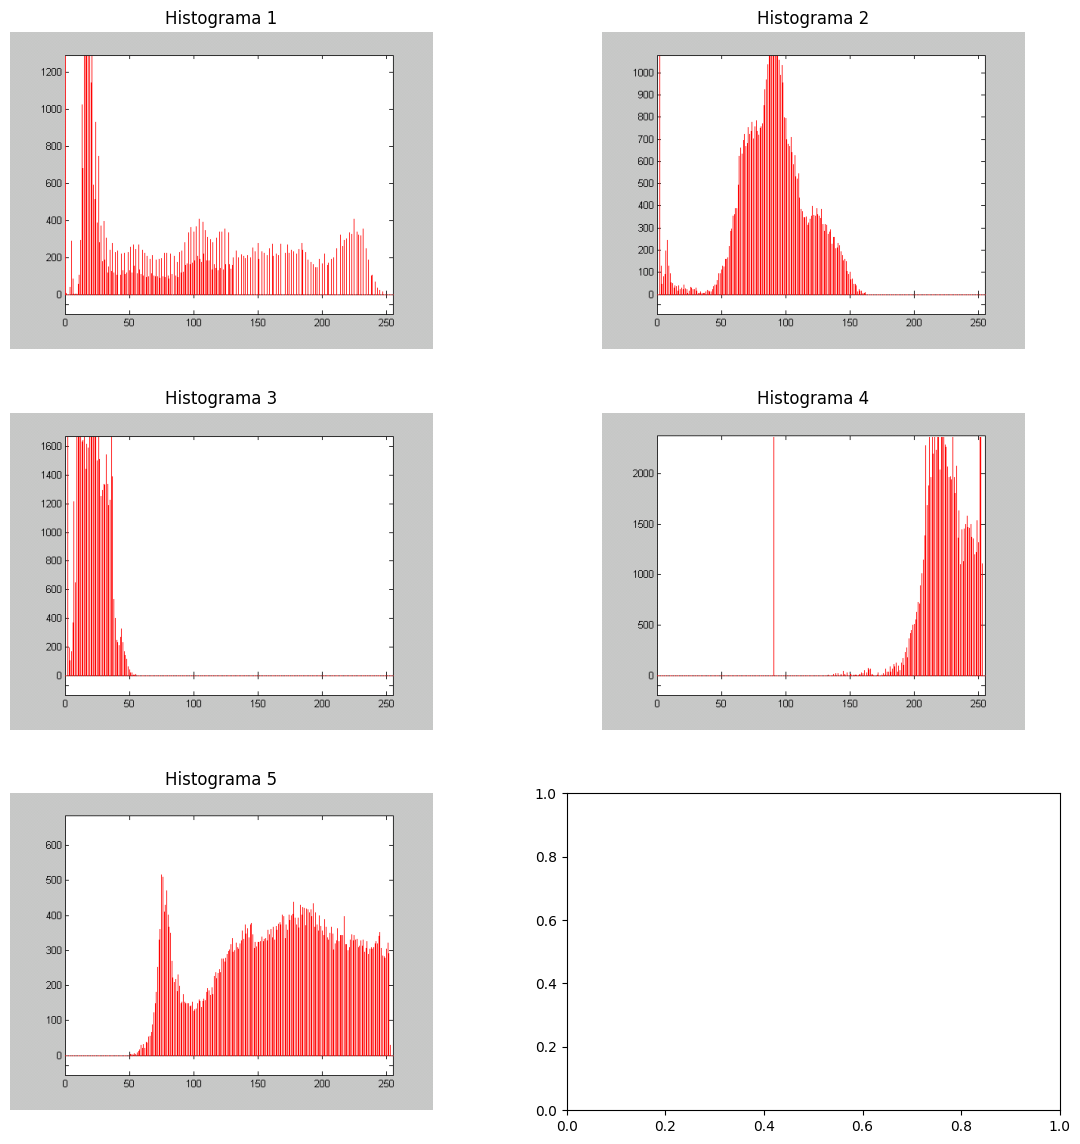

In [ ]:
# EJERCICIO 1.2
histo1 = cv2.imread('histo1.tif',cv2.IMREAD_COLOR)
histo2 = cv2.imread('histo2.tif',cv2.IMREAD_COLOR)
histo3 = cv2.imread('histo3.tif',cv2.IMREAD_COLOR)
histo4 = cv2.imread('histo4.tif',cv2.IMREAD_COLOR)
histo5 = cv2.imread('histo5.tif',cv2.IMREAD_COLOR)

fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(14,14))
ax[0,0].imshow(histo1)
ax[0,0].set_title('Histograma 1')
ax[0,0].axis('off')
ax[0,1].imshow(histo2)
ax[0,1].set_title('Histograma 2')
ax[0,1].axis('off')
ax[1,0].imshow(histo3)
ax[1,0].set_title('Histograma 3')
ax[1,0].axis('off')
ax[1,1].imshow(histo4)
ax[1,1].set_title('Histograma 4')
ax[1,1].axis('off')
ax[2,0].imshow(histo5)
ax[2,0].set_title('Histograma 5')
ax[2,0].axis('off')


plt.show()

Histograma 1: posee pixeles en la mayoria de las intensidades, pero la mayor concentracion se encuentra entre los primero 50 de intensidad, por lo que deberia ser una imagen donde prevalecen los pixeles oscuros. Aun asi posee pixeles en casi todas las intensidades por lo que puede tener un contraste decente.

Histograma 2: la concentracion se da cerca de los 100, parece una distribucion gauseana, por lo que se puede decir que la imagen deberia ser bastante homogenea en intensidad y no tendria mucho contraste

Histograma 3: esta imagen posee todos los pixeles dentro del rango de intensidad [0,50], de modo que será muy oscura

Histograma 4: por el contrario a la imagen 3, en esta imagen, segun el histograma, deberia tener una intensidad clara, ya que la mayoria de los pixeles estan en las intensidades mayores a 150, salvo por algunos que se encuentra cerca de 100, que podrian ser aquellos de los bordes

Histograma 5: segun este histograma la imagen parece algo homogenea pero en escala de grises medios tirando a claros, ya que no tiene pixeles cuya insidad sea de 50 o menos.

Segun estas deducciones los histogramas y las imagenes se corresponden:

Histograma 1 -> Imagen C

Histograma 2 -> Imagen D

Histograma 3 -> Imagen E

Histograma 4 -> Imagen B

Histograma 5 -> Imagen A


Histograma  1
Media : 234.375
Varianza : 131734.1484375
Asimetria : 2.296400637485128
Energia : 120000
Entropia : 6.592177233557798
-----------------------
Histograma  2
Media : 417.1875
Varianza : 726804.78515625
Asimetria : 2.2923460615364992
Energia : 213600
Entropia : 5.861619083261708
-----------------------
Histograma  3
Media : 234.375
Varianza : 211493.3984375
Asimetria : 5.47232331337086
Energia : 120000
Entropia : 6.739286398507357
-----------------------
Histograma  4
Media : 225.8359375
Varianza : 23729.613708496094
Asimetria : -0.40298121293204586
Energia : 115628
Entropia : 7.510771795048202
-----------------------
Histograma  5
Media : 234.375
Varianza : 392815.78125
Asimetria : 3.3058726261766265
Energia : 120000
Entropia : 5.203148086412085
-----------------------


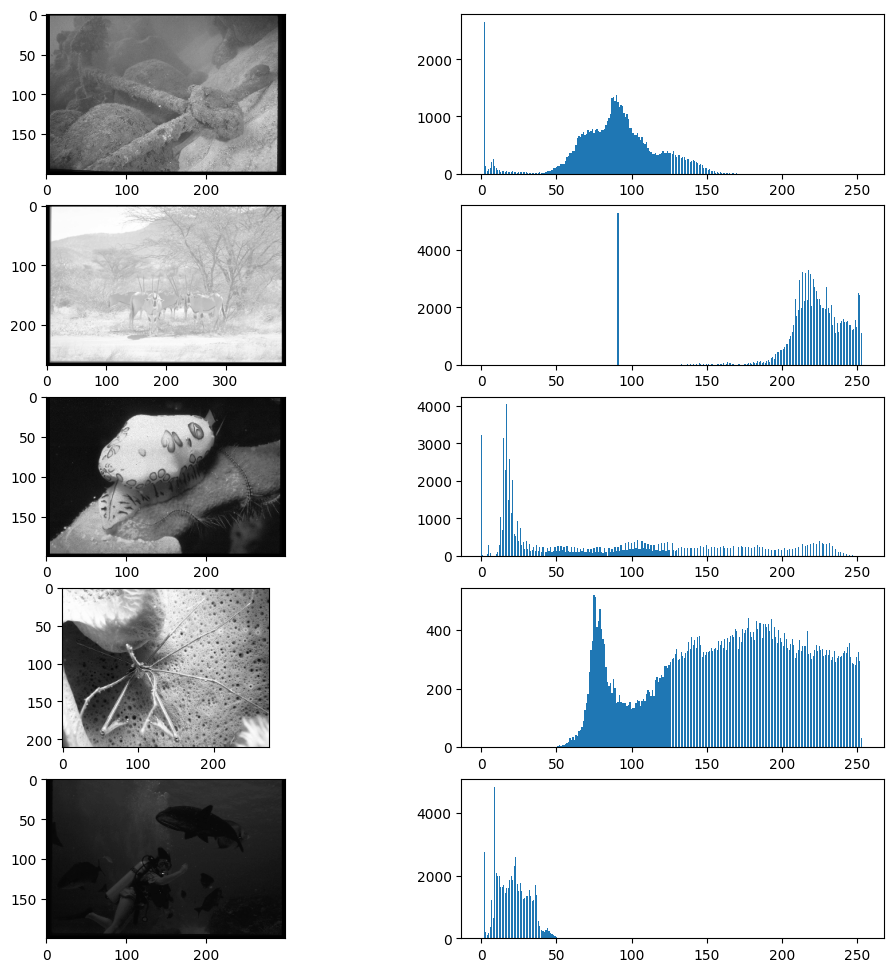

In [ ]:
import scipy as scp

# cargo las imagenes y los histogramas
fig,ax = plt.subplots(ncols=2,nrows=5,figsize=(12,12))

# imagenes
imgA = cv2.imread('imagenA.tif',cv2.IMREAD_GRAYSCALE)
imgB = cv2.imread('imagenB.tif',cv2.IMREAD_GRAYSCALE)
imgC = cv2.imread('imagenC.tif',cv2.IMREAD_GRAYSCALE)
imgD = cv2.imread('imagenD.tif',cv2.IMREAD_GRAYSCALE)
imgE = cv2.imread('imagenE.tif',cv2.IMREAD_GRAYSCALE)

images = [imgA,imgB,imgC,imgD,imgE]

for i in range(0,5):
    hist = cv2.calcHist([images[i]],[0],None,[256],[0,256]).astype(int)
    hist = [elemento for sublist in hist for elemento in sublist]
    ax[i,0].imshow(images[i],cmap='gray')
    ax[i,1].bar(x=np.arange(0,256),height=hist)
    # Obtenga y analice la utilidad de las siguientes propiedades estadısticas de los histogramas: media, varianza, asimetrıa, energıa y entropıa.
    print('Histograma ',str(i+1))
    print('Media :',np.mean(hist))
    print('Varianza :',np.var(hist))
    print('Asimetria :',scp.stats.skew(hist))
    print('Energia :',np.sum(np.dot(hist,2)))

    probabilidades = hist / np.sum(hist)
    probabilidades = probabilidades[probabilidades != 0]
    print('Entropia :',-np.sum(probabilidades * np.log2(probabilidades)))
    print('-----------------------')

#La media es el valor promedio de todos los pixeles y nos puede servir para saber el brillo medio de la imagen.
#La varianza indica el nivel de variabilidad de la imagen, una varianza baja indica un distribucion uniforme de la imagen y puede indicar homogeneidad
    #una varianza alta puede indicar buena textura.
#La entropía es una medida de la cantidad de informacion o aleatoriedad presente en la imagen. Una entropía alta indica una distribucion de pixeles
    # mas aleatoria y mayor complejidad en la imagen, mientras que una entropia baja indica un distribucion mas uniforme y predecible.
#La asimetria: una asimetria positiva indica una cola mas larga del lado derecho de la media y una negativa una cola mas larga del lado izqueirdo de la media
#La energía: la energia por si sola si es muy alta podria decir que hay pixeles mas blanco pero no es un medida que sirva
    # en cambio si verificamos que tiene una entropia alta y mucha energia a la vez puede significar que tenga un alto contraste.

## Guía 3 - Ejercicio 4.2

In [ ]:
def crear_filtro_promediador(kernel_size,tipo):
  if tipo == 0:
    # filtro de caja para suavizar una imagen reduciendo el ruido y eliminando detalles pequeños
    return np.ones((kernel_size,kernel_size),np.float32) / (kernel_size*kernel_size)
  else:
    # filtro de cruz
    filtro = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    filtro[:, int(kernel_size/2)] = 1.0
    filtro[int(kernel_size/2), :] = 1.0
    return filtro / kernel_size

Text(0.5, 1.0, 'filtro bilateal lapices')

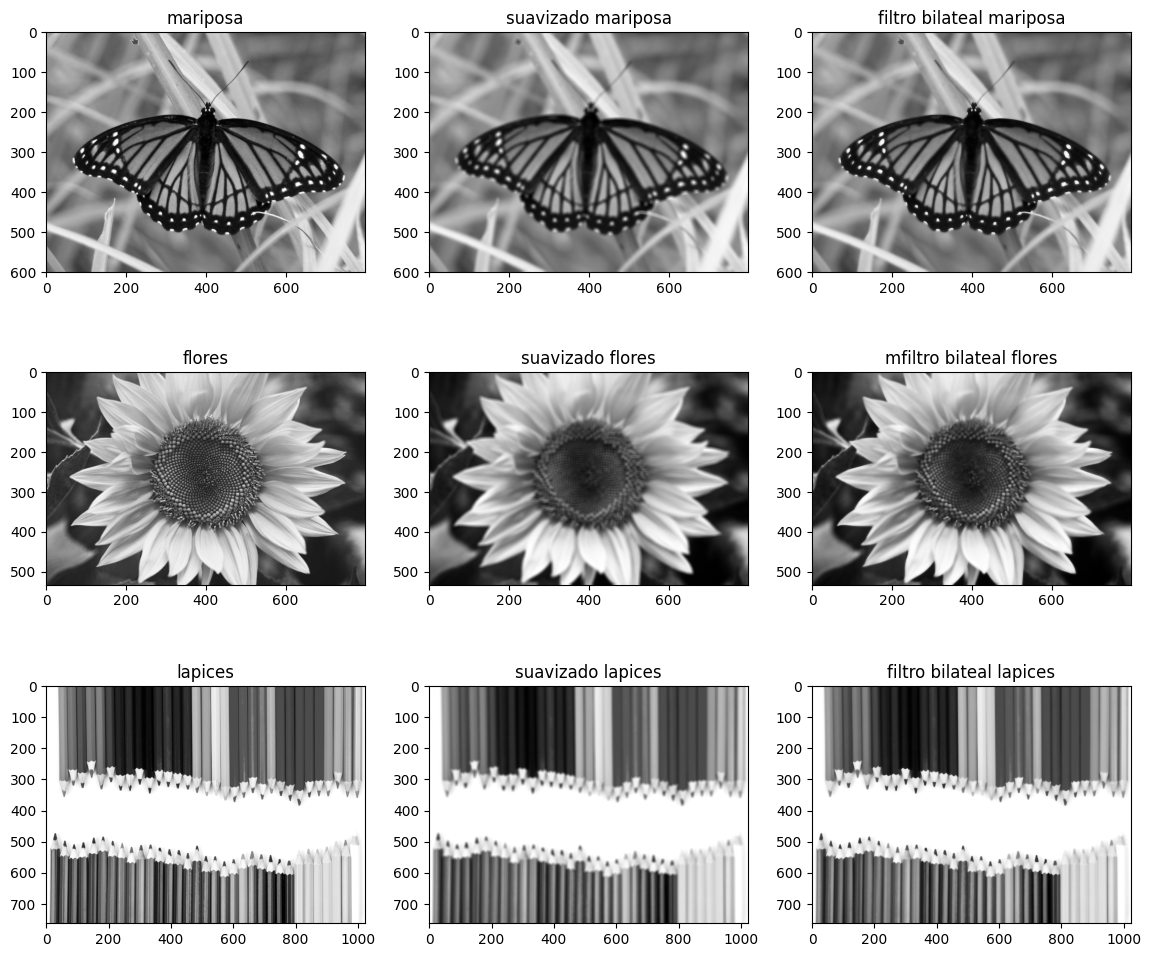

In [ ]:
mariposa02 =cv2.imread('mariposa02.png',cv2.IMREAD_GRAYSCALE)
flores02 =cv2.imread('flores02.jpg',cv2.IMREAD_GRAYSCALE)
lapices02 =cv2.imread('lapices02.jpg',cv2.IMREAD_GRAYSCALE)

#filtro de suavizado comun
kernel_size = 9
filtro_caja = crear_filtro_promediador(kernel_size,tipo=0)
filtro_mapiposa = crear_filtro_promediador(kernel_size,tipo=0) # tipo 0 box
mariposa_suaviazada = cv2.filter2D(mariposa02, -1, filtro_caja)
filtro_flores = crear_filtro_promediador(kernel_size,tipo=0) # tipo 0 box
flores_suaviazada = cv2.filter2D(flores02, -1, filtro_caja)
filtro_lapices = crear_filtro_promediador(kernel_size,tipo=0) # tipo 0 box
lapices_suaviazada = cv2.filter2D(lapices02, -1, filtro_caja)

# teniendo en cuenta la distancia espacial y la diferencia en intensidad el filtro bilateral
  #es capaz de suavizar la imagen mientra preserva importantes bordes y detalles
d = 9             # Diámetro de cada vecindad de píxeles
sigma_color = 75
sigma_space = 75
bf_mariposa = cv2.bilateralFilter(mariposa02, d, sigma_color, sigma_space)
bf_flores = cv2.bilateralFilter(flores02, d, sigma_color, sigma_space)
bf_lapices = cv2.bilateralFilter(lapices02, d, sigma_color, sigma_space)

# Comparamos filtro de suavizado comun vs filtro bilateral
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(14,12))
ax[0,0].imshow(mariposa02,cmap='gray');ax[0,0].set_title('mariposa')
ax[0,1].imshow(mariposa_suaviazada,cmap='gray');ax[0,1].set_title('suavizado mariposa')
ax[0,2].imshow(bf_mariposa,cmap='gray');ax[0,2].set_title('filtro bilateal mariposa')

ax[1,0].imshow(flores02,cmap='gray');ax[1,0].set_title('flores')
ax[1,1].imshow(flores_suaviazada,cmap='gray');ax[1,1].set_title('suavizado flores')
ax[1,2].imshow(bf_flores,cmap='gray');ax[1,2].set_title('mfiltro bilateal flores')

ax[2,0].imshow(lapices02,cmap='gray');ax[2,0].set_title('lapices')
ax[2,1].imshow(lapices_suaviazada,cmap='gray');ax[2,1].set_title('suavizado lapices')
ax[2,2].imshow(bf_lapices,cmap='gray');ax[2,2].set_title('filtro bilateal lapices')


In [ ]:
# eligimos fila 300 de lapices
fila = 300
# obtengo la intensidad de toda la fila en cada caso
intensidad_original = lapices02[:,fila]
intensidad_suaviazada = lapices_suaviazada[:,fila]
intensidad_bilateral = bf_lapices[:,fila]

# grafico el perfil intensidad
fig, ax2 = plt.subplots(nrows=1, ncols=3, figsize=(14,5))
ax2[0].plot(intensidad_original); ax2[0].set_title("intensidad originala")
ax2[1].plot(intensidad_suaviazada);ax2[1].set_title("intensidad con el filtro comun")
ax2[2].plot(intensidad_bilateral);ax2[2].set_title("intensidad con el filtro bilateral")


NameError: name 'lapices02' is not defined

## Guía 4 - Ejercicio 4 (opcional) / Guía 4 - Ejercicio 5.2

In [5]:
# EJERCICIO 4
img_futbol = cv2.imread('futbol.jpg')

# convertimos las imagenes en rgb y en hsv
img_futbol_rgb = cv2.cvtColor(img_futbol,cv2.COLOR_RGB2BGR)
img_futbol_hsv = cv2.cvtColor(img_futbol,cv2.COLOR_RGB2HSV)

# para el modelo rgb usamos mapeo esferico
#   if( np.sum( (pixel_value - center_sphere)**2 ) < radius) =>  Si = Ri
#   else   =>  Si = [0,0,0] -> black

# para el modelo hsv usamos el mapeo de rectangulo

In [6]:
def generate_mask_sphere(center, radius, img):
  mask = np.zeros(img.shape)
  for i in np.arange(0, mask.shape[0]):
      for j in np.arange(0, mask.shape[1]):
          if np.sum((img[i,j] - center)**2) < radius**2:
              mask[i,j] = [255,255,255]
  return mask.astype(np.uint8)

def generate_mask_rectangle(lower_limit, upper_limit,  img):
  # upper_limit = np.array([lower_limit[0]+rectangle,255,255]).astype(np.uint8)
  print('lower limit hue ',lower_limit[0])
  print('uper limit hue ',upper_limit[0])
  mask = cv2.inRange(img,lower_limit,upper_limit)
  return mask.astype(np.uint8)

In [7]:
def segmentation_sphere_rgb(red,green,blue,radius,img):
  center_sphere_rgb = np.array([red,green,blue])
  # obtenemos la mascara y el segmento de la imagen usando bitwise_and
  mask = generate_mask_sphere(center_sphere_rgb,radius,img)
  segment = cv2.bitwise_and(img,mask)
  # ploteamos la imagen original y el segmento obtenido con el mapeo esferico
  fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(10,10))
  ax[0].imshow(img)
  ax[0].set_title('Imagen RGB')
  ax[1].imshow(mask,cmap='gray')
  ax[1].set_title('Mask')
  ax[2].imshow(segment)
  ax[2].set_title('Image Segment with sphere mapping')

In [11]:
def segmentation_rectangle_hsv(lower,upper,img):
  mask = generate_mask_rectangle(lower, upper, img)
  h_channel, s_channel, v_channel = cv2.split(img)
  h_channel = cv2.bitwise_and(h_channel,mask)
  s_channel = cv2.bitwise_and(s_channel,mask)
  v_channel = cv2.bitwise_and(v_channel,mask)
  img_segmented = cv2.merge((h_channel, s_channel, v_channel))
  img_segmented_bgr = cv2.cvtColor(img_segmented, cv2.COLOR_HSV2BGR)
  # img_segmented_bgr = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
  # img_sermented_bgr = cv2.bitwise_and(img_segmented_bgr,mask)
  # ploteamos la imagen original y el segmento obtenido con el mapeo rectangular
  fig,ax2 = plt.subplots(nrows=1,ncols=3,figsize=(10,10))
  ax2[0].imshow(cv2.cvtColor(img, cv2.COLOR_HSV2BGR))
  ax2[0].set_title('Imagen HSV')
  ax2[1].imshow(mask,cmap='gray')
  ax2[1].set_title('Mask')
  ax2[2].imshow(img_segmented_bgr)
  ax2[2].set_title('Image Segment with rectangle mapping')

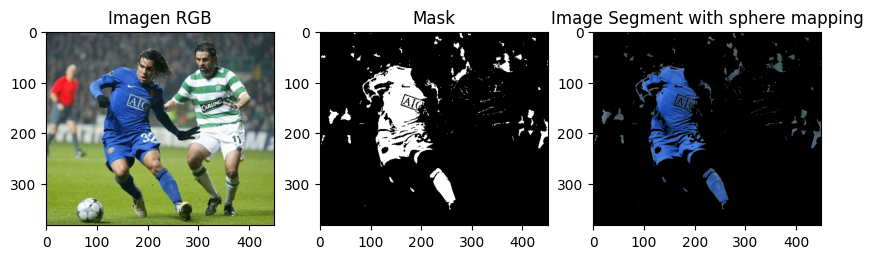

In [9]:
# el mapeo rgb definimos un color como centro de la esfera y una radio
r_value = 26; g_value = 78; b_value = 179
radius_rgb = 100
segmentation_sphere_rgb(r_value,g_value,b_value,radius_rgb,img_futbol_rgb)

lower limit hue  10
uper limit hue  15


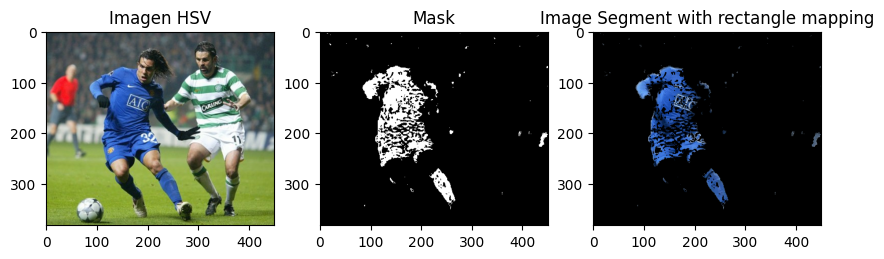

In [12]:
# el mapeo hsv define un limite de los canales y un radio del rectangulo
lower_limit = np.array([img_futbol_hsv[150,150,0],50,50]).astype(np.uint8)
 # setting the lower limit
rec = 5
u_limit = np.array([lower_limit[0]+rec,255,255]).astype(np.uint8)

segmentation_rectangle_hsv(lower_limit,u_limit,img_futbol_hsv)

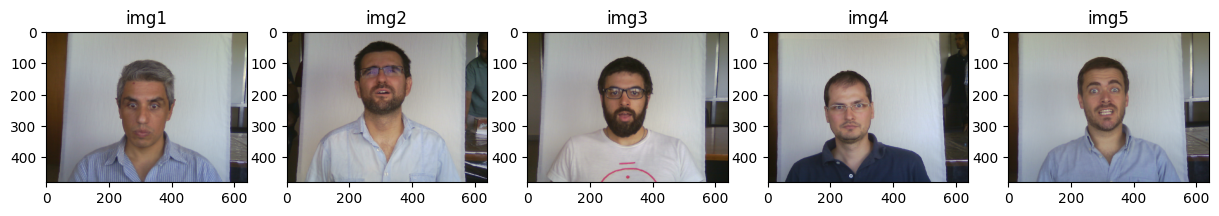

In [13]:

#Carga de imagenes, paso a BGR y visualizamos
img1 = cv2.cvtColor(cv2.imread('s01_i08_H_CM.png'),cv2.COLOR_RGB2BGR)
img2 = cv2.cvtColor(cv2.imread('s03_i10_H_DM.png'),cv2.COLOR_RGB2BGR)
img3 = cv2.cvtColor(cv2.imread('s05_i08_H_LB.png'),cv2.COLOR_RGB2BGR)
img4 = cv2.cvtColor(cv2.imread('s06_i13_H_LV.png'),cv2.COLOR_RGB2BGR)
img5 = cv2.cvtColor(cv2.imread('s08_i06_H_MA.png'),cv2.COLOR_RGB2BGR)
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(15,15))
ax[0].imshow(img1); ax[0].set_title('img1')
ax[1].imshow(img2); ax[1].set_title('img2')
ax[2].imshow(img3); ax[2].set_title('img3')
ax[3].imshow(img4); ax[3].set_title('img4')
ax[4].imshow(img5); ax[4].set_title('img5')
img1_hsv = cv2.cvtColor(img1,cv2.COLOR_BGR2HSV)
img2_hsv = cv2.cvtColor(img2,cv2.COLOR_BGR2HSV)
img3_hsv = cv2.cvtColor(img3,cv2.COLOR_BGR2HSV)
img4_hsv = cv2.cvtColor(img4,cv2.COLOR_BGR2HSV)
img5_hsv = cv2.cvtColor(img5,cv2.COLOR_BGR2HSV)
#Visualizamos los valores de un pequeño segmento de la piel para cada imagen en BGR
#print(img1[195,245:250],img2[100,245:250],img3[155,245:250],img4[200,245:250],img5[150,245:250])
#Se observa una alta variabilidad de valores para la piel de estas personas aunque a la vista tienen un color similar
 #cuando se observa sus valores BGR, estos no son similares.

#Visualizamos los valores de un pequeño segmento de la piel para cada imagen en HSV
#print(img1_hsv[195,245:250],img2_hsv[100,245:250],img3_hsv[155,245:250],img4_hsv[200,245:250],img5_hsv[150,245:250])
#En este caso se observa que los valores de hue son similares en los 5 casos y aunque lo demas si varian bastante, podemos usar
 #el valor de tonada para segmentar la imagen

lower limit hue  100
uper limit hue  120


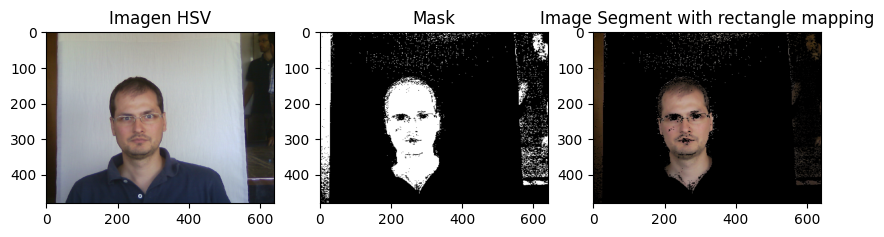

In [14]:
lower_limit = np.array([100,0,20]).astype(np.uint8)
rec = 5
u_limit = np.array([120,255,255]).astype(np.uint8)
#segmentation_rectangle_hsv(lower_limit,u_limit,img1_hsv)
#segmentation_rectangle_hsv(lower_limit,u_limit,img2_hsv)
#segmentation_rectangle_hsv(lower_limit,u_limit,img3_hsv)
segmentation_rectangle_hsv(lower_limit,u_limit,img4_hsv)
#segmentation_rectangle_hsv(lower_limit,u_limit,img5_hsv)

In [15]:
#Conclusiones EJERCICIO 4

#¿Qué método es mejor? Depende, aunque el RGB es mas limitado.
#El caso de segmentar por medio del método RGB es útil cuando el o los objetos que estamos buscando
 #tienen un color espeficifico buscado(más aun si se trata de un color primario) y, ademas,
 #donde la condiciones de iluminacion no varian demasiado.
#En el caso de segmentar por medio del método HSV conviene cuando se observa tonos simlares y ademas
 # termina siendo mas robusto cuando las condiciones de iluminacion varian, ya que podemos
 # segmentar a travez del tono y saturación en tal caso, o solo el tono.

#¿Es posible obtener un conjunto de valores optimo para todas las imagenes?
#El conjunto de valores optimo para cada imagen dependera de el tipo de objeto que se desea segmentar,
 #las condiciones de iluminación, la variabilidad en los colores de fondo y la presencia de ruido en la imagen.
 #Sin embargo se puede llegar a conjunto de valores bastante optimos a travez de un analisis hecho al objeto
 #en particular, viendo sus valores habituales, maximos y minimos en el espacio de color o ,tambien,
 #ajustar el conjunto de valores en tiempo real y ver como se va segmentando la imagen

#En algunos casos puede ser sufienciente, sin embargo aplicar ternicas de preprocesamiento pueden mejorar
 #significativamente la segmentacion de la imagen, por ejemplo se puede:
 #homogeneizar mas ciertas zonas que no son de interes, mejorar el constraste para detectar mejor los objetos,
 #reducir o eliminar el ruido, eliminar objetos no deseados.

#¿Donde cree usted que estan los mayores inconvenientes?
 #Cuando el objeto tiene caracteristicas muy variadas, para casos de superpocicion de objetos,
 #para objetos que fueron alterados de alguna manera, lo limites del objeto son difciles de determinar con
 #precision. Para estos casos se puede difultar la segmentacion
 #puede resultar no tan efectiva.

#¿Que condiciones observa en la escena que son homogeneas y cuales heterogeneas?
#Homogeneas:
 #Distancia camara-objeto: las personas si situan a la misma distancia de la camanara
 #Foco: Todas las personas en la escena están enfocados con la misma claridad y nitidez
 #Iluminacion ambiente: se presenta siempre una iluminacion muy similar
 #Fondo: es siempre blanco, aunque con ligeras diferencias en los bordes
 #Piel: los tonos de piel son similares de personas blancas o persona de tez clara
 #Posicion del objeto: todos se situan de frente a la camara
#Heterogeneas:
 #Vestimenta: presentan ondulaciones, colores, tonos, saturaciones diferentes
 #Accesorios: algunos presentan lentes y otros no.
 #Forma del objeto: las personas presentan gestos faciales diferentes.

In [16]:
# EJERCICIO 5.2
img_deforestacion = cv2.imread('Deforestacion.png')

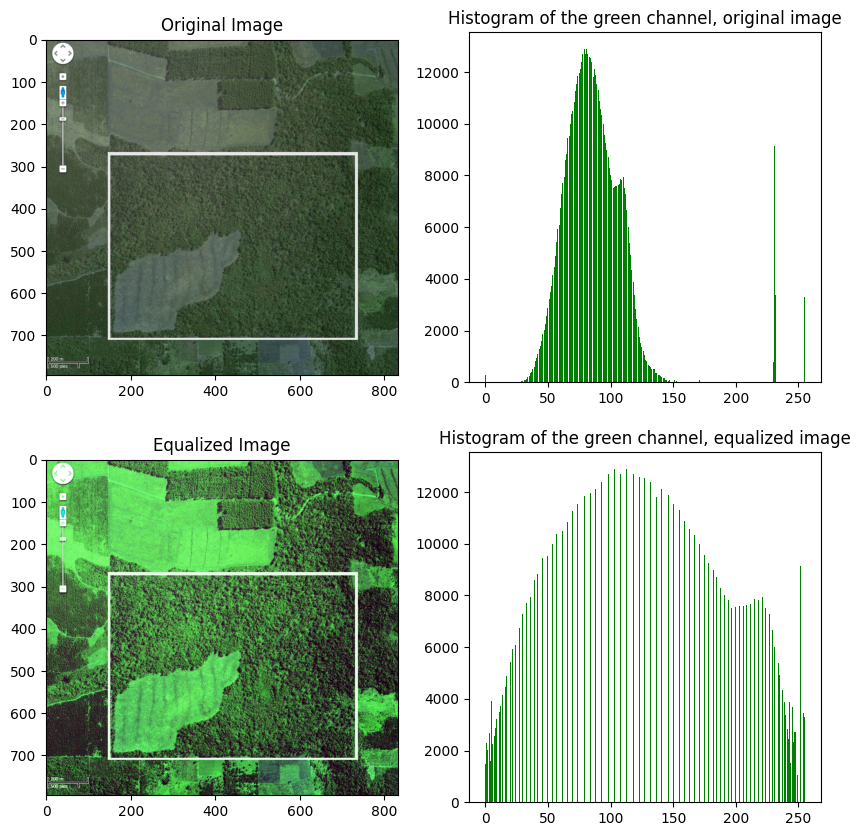

In [20]:
# keep the bgr model
b_channel, g_channel, r_channel = cv2.split(img_deforestacion)
hist1 = cv2.calcHist([img_deforestacion],[1],None,[256],[0,256]).astype(int)
hist1 = [elemento for sublist in hist1 for elemento in sublist]

g_channel_equ = cv2.equalizeHist(g_channel)
img_def_equ = cv2.merge((b_channel, g_channel_equ, r_channel))
hist2 = cv2.calcHist([img_def_equ],[1],None,[256],[0,256]).astype(int)
hist2 = [elemento for sublist in hist2 for elemento in sublist]

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
ax[0,0].imshow(img_deforestacion)
ax[0,0].set_title('Original Image')
ax[0,1].bar(x=np.arange(0,256),height=hist1,color='green')
ax[0,1].set_title('Histogram of the green channel, original image')
ax[1,0].imshow(img_def_equ)
ax[1,0].set_title('Equalized Image')
ax[1,1].bar(x=np.arange(0,256),height=hist2,color='green')
ax[1,1].set_title('Histogram of the green channel, equalized image')
plt.show()


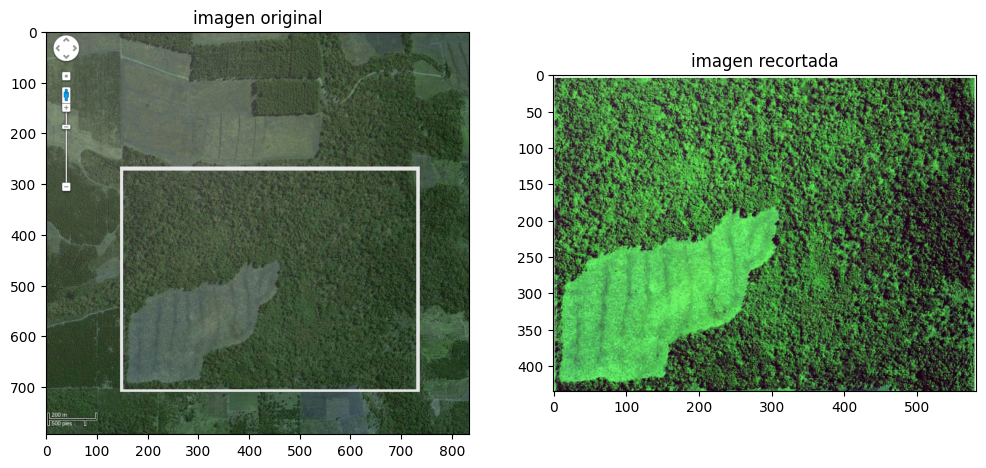

In [32]:
# obtengo la parte de la imagen que esta remarcada
img_copy_hsv = cv2.cvtColor(img_def_equ, cv2.COLOR_BGR2HSV)

# para los puntos que corresponden al cuadrado uso el v channel
h_channel, s_channel, v_channel = cv2.split(img_copy_hsv)
start = [200,120]
points = []
last = [0,0]
for i in np.arange(start[0],img_copy_hsv.shape[0]):
  for j in np.arange(start[1],img_copy_hsv.shape[1]):
    if v_channel[i,j] > 250:
      last = [i,j]
      if len(points) == 0:
        points.append([i,j])
points.append(last)

# pixeles de grosor del cuadrado de la imagen original
pix = 4

img_recortada = img_def_equ[points[0][0]+pix:points[1][0]-pix, points[0][1]+pix:points[1][1]-pix]

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,12))
ax[0].imshow(img_deforestacion)
ax[0].set_title('imagen original')
ax[1].imshow(img_recortada)
ax[1].set_title('imagen recortada')
plt.show()

lower limit hue  50
uper limit hue  61


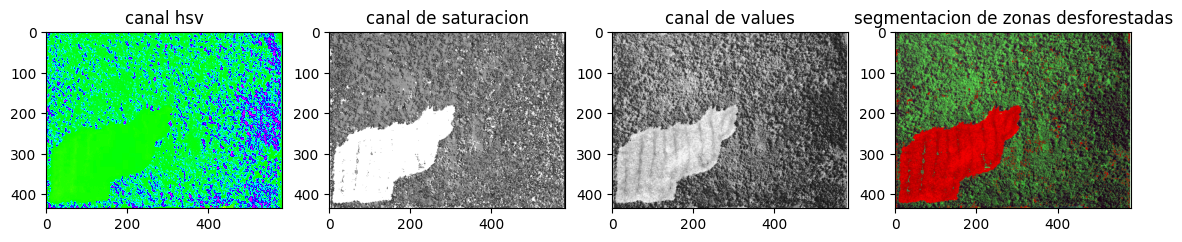

In [61]:
# uso el modelo hsv de nuevo
img_hsv = cv2.cvtColor(img_recortada,cv2.COLOR_BGR2HSV)

# usando el modelo hsv, hago la segementacion basada en el valor del hue y en el canal de saturacion
# el valor mayor y menor de los tonos de verdes sirven para distinguir la zonas de las imagenes si es forestada o desforestada
low = np.array([50,120,150])
upp = np.array([61,160,255])

mask = generate_mask_rectangle(low, upp, img_hsv)
h_channel, s_channel, v_channel = cv2.split(img_hsv)
segment = h_channel.copy()
for i in np.arange(0,mask.shape[0]):
  for j in np.arange(0,mask.shape[1]):
    if mask[i,j] == 255:
      segment[i,j] = 120  # como el modelo cargada es bgr -> el rojo estaria cerca de los 120
      s_channel[i,j] = 255

img_segmented = cv2.merge((segment, s_channel, v_channel))
img_segmented = cv2.cvtColor(img_segmented, cv2.COLOR_HSV2BGR)

fig,ax2 = plt.subplots(nrows=1,ncols=4,figsize=(14,14))
ax2[0].imshow(h_channel,cmap='hsv')
ax2[0].set_title('canal hsv')
ax2[1].imshow(s_channel,cmap='gray')
ax2[1].set_title('canal de saturacion')
ax2[2].imshow(v_channel,cmap='gray')
ax2[2].set_title('canal de values')
ax2[3].imshow(img_segmented)
ax2[3].set_title('segmentacion de zonas desforestadas')
plt.show()

In [63]:
img_copy_hsv = cv2.cvtColor(img_segmented, cv2.COLOR_BGR2HSV)
h_channel, s_channel, v_channel = cv2.split(img_copy_hsv)

number_pixels_square = (points[1][0] - points[0][0])*(points[1][1] - points[0][1])
print('total de pixeles de la zona remarcada: ',number_pixels_square)
print('metros cuadrados de la zona remarcada: ',number_pixels_square*2)
print('numero de hectareas de la zona remarcada: ',number_pixels_square*2/10000)
print('------------------------')
# para el area de las zonas deforestada obtengo el numero de pixeles que segemente anteriormente
# recorro los pixeles de la imagen y aquellos cuyo valor de hue sea 120 entonces lo cuento
number_pixel_deforested = np.count_nonzero(h_channel == 120)
print('numero de pixeles aproximado de las zonas deforestada: ',number_pixel_deforested)
print('metros cuadradados de las zonas deforestada: ',number_pixel_deforested*2)
print('numero de hectareas de las zonas deforestada: ',number_pixel_deforested*2/10000)
print('------------------------')
# para el area de las zonas de monte
# considero el total de los pixeles del cuadrado y le resto el de las zonas forestadas
number_pixel_forest = (img_recortada.shape[0]*img_recortada.shape[1])-number_pixel_deforested
print('numero de pixeles de la zona forestada: ',number_pixel_forest)
print('metros cuadraddos de la zona forestada: ',number_pixel_forest*2)
print('numero de hectareas de la zona forestada: ',number_pixel_forest*2/10000)

total de pixeles de la zona remarcada:  261370
metros cuadrados de la zona remarcada:  522740
numero de hectareas de la zona remarcada:  52.274
------------------------
numero de pixeles aproximado de las zonas deforestada:  51013
metros cuadradados de las zonas deforestada:  102026
numero de hectareas de las zonas deforestada:  10.2026
------------------------
numero de pixeles de la zona forestada:  202157
metros cuadraddos de la zona forestada:  404314
numero de hectareas de la zona forestada:  40.4314
